In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_cherry_only_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n55         13.2039 (12.4052, 14.0222) (12.3831, 13.9972)  1.6141 (Jnode 106)\n',
 't_n56         13.1414 (12.3533, 13.9504) (12.3334, 13.9237)  1.5902 (Jnode 105)\n',
 't_n57         12.2138 (11.4942, 12.9489) (11.4768, 12.9266)  1.4498 (Jnode 104)\n',
 't_n58         10.8468 (10.2323, 11.4602) (10.1950, 11.4209)  1.2260 (Jnode 103)\n',
 't_n59         10.3347 ( 9.7398, 10.9309) ( 9.7356, 10.9234)  1.1878 (Jnode 102)\n',
 't_n60          9.7539 ( 9.1703, 10.3345) ( 9.1497, 10.3110)  1.1613 (Jnode 101)\n',
 't_n61          8.9107 ( 8.3494,  9.4737) ( 8.3491,  9.4730)  1.1239 (Jnode 100)\n',
 't_n62          4.8657 ( 4.1880,  5.4186) ( 4.1709,  5.3981)  1.2272 (Jnode 99)\n',
 't_n63          5.2900 ( 4.9243,  5.7540) ( 4.9188,  5.7449)  0.8260 (Jnode 98)\n',
 't_n64          3.4765 ( 3.1708,  3.7938) ( 3.1674,  3.7888)  0.6214 (Jnode 97)\n',
 't_n65          3.0005 ( 2.7306,  3.2871) ( 2.7289,  3.2847)  0.5558 (Jnode 96)\n',
 't_n66          2.3524 ( 2.1381,  2.5871) ( 2.1343,  2.58

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_iqtree.append(float(line[3][1:-1]))
    else:
        lower_ci_iqtree.append(float(line[3][1:-1]))
    if line[4].startswith('('):
        upper_ci_iqtree.append(float(line[4][1:-1]))
    else:
        upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
#
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [6]:
posterior_mean_iqtree

[13.2039,
 13.1414,
 12.2138,
 10.8468,
 10.3347,
 9.7539,
 8.9107,
 4.8657,
 5.29,
 3.4765,
 3.0005,
 2.3524,
 1.662,
 1.1518,
 0.625,
 3.9778,
 9.8929,
 8.8007,
 8.7379,
 6.2342,
 5.4611,
 5.1315,
 10.0081,
 9.4263,
 9.0091,
 8.4701,
 7.795,
 7.5013,
 6.6503,
 6.0262,
 5.4306,
 4.1095,
 3.5775,
 6.5767,
 5.1158,
 9.7205,
 2.6597,
 9.3961,
 8.5988,
 7.5064,
 6.822,
 4.9652,
 5.4048,
 7.2164,
 6.7877,
 6.0312,
 4.8954,
 6.6872,
 10.5611,
 6.3232,
 3.7285,
 4.0928,
 8.2662]

In [7]:
lower_ci_iqtree

[4.0222,
 3.9504,
 2.9489,
 1.4602,
 0.7398,
 0.1703,
 0.3494,
 0.188,
 0.9243,
 0.1708,
 0.7306,
 0.1381,
 0.5071,
 0.0407,
 0.6143,
 0.6244,
 0.3159,
 0.2003,
 0.1822,
 0.6949,
 0.9659,
 0.046,
 0.4538,
 0.886,
 0.4876,
 0.9705,
 0.332,
 0.0405,
 0.2162,
 0.6107,
 0.0402,
 0.7439,
 0.2268,
 0.1312,
 0.7238,
 0.1786,
 0.222,
 0.868,
 0.1165,
 0.0832,
 0.4374,
 0.423,
 0.1275,
 0.707,
 0.2826,
 0.5207,
 0.2637,
 0.0957,
 0.781,
 0.5289,
 0.1372,
 0.539,
 0.1574]

In [8]:
upper_ci_iqtree

[12.3831,
 12.3334,
 11.4768,
 10.195,
 10.9309,
 10.3345,
 9.4737,
 5.4186,
 5.754,
 3.7938,
 3.2871,
 2.5871,
 1.8327,
 1.2773,
 0.6516,
 4.4202,
 10.4774,
 9.4066,
 9.3074,
 6.8428,
 6.0556,
 5.3689,
 10.5664,
 9.9588,
 9.5307,
 8.9706,
 8.2556,
 7.9556,
 7.0834,
 6.4455,
 5.8352,
 4.5063,
 3.972,
 6.9974,
 5.3467,
 10.2694,
 3.157,
 9.9259,
 9.0826,
 7.9239,
 7.1905,
 5.3837,
 5.5353,
 7.7092,
 7.2754,
 6.5238,
 5.405,
 7.2883,
 11.3386,
 7.1453,
 4.3072,
 4.8286,
 9.3721]

In [9]:
file_LG = open("LG_cherry_only_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_baseml.append(float(line[3][1:-1]))
    else:
         lower_ci_baseml.append(float(line[3][:-1]))
    if line[4].startswith('('):
        upper_ci_baseml.append(float(line[4][1:-1]))
    else:
         upper_ci_baseml.append(float(line[4][:-1]))
        
    
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

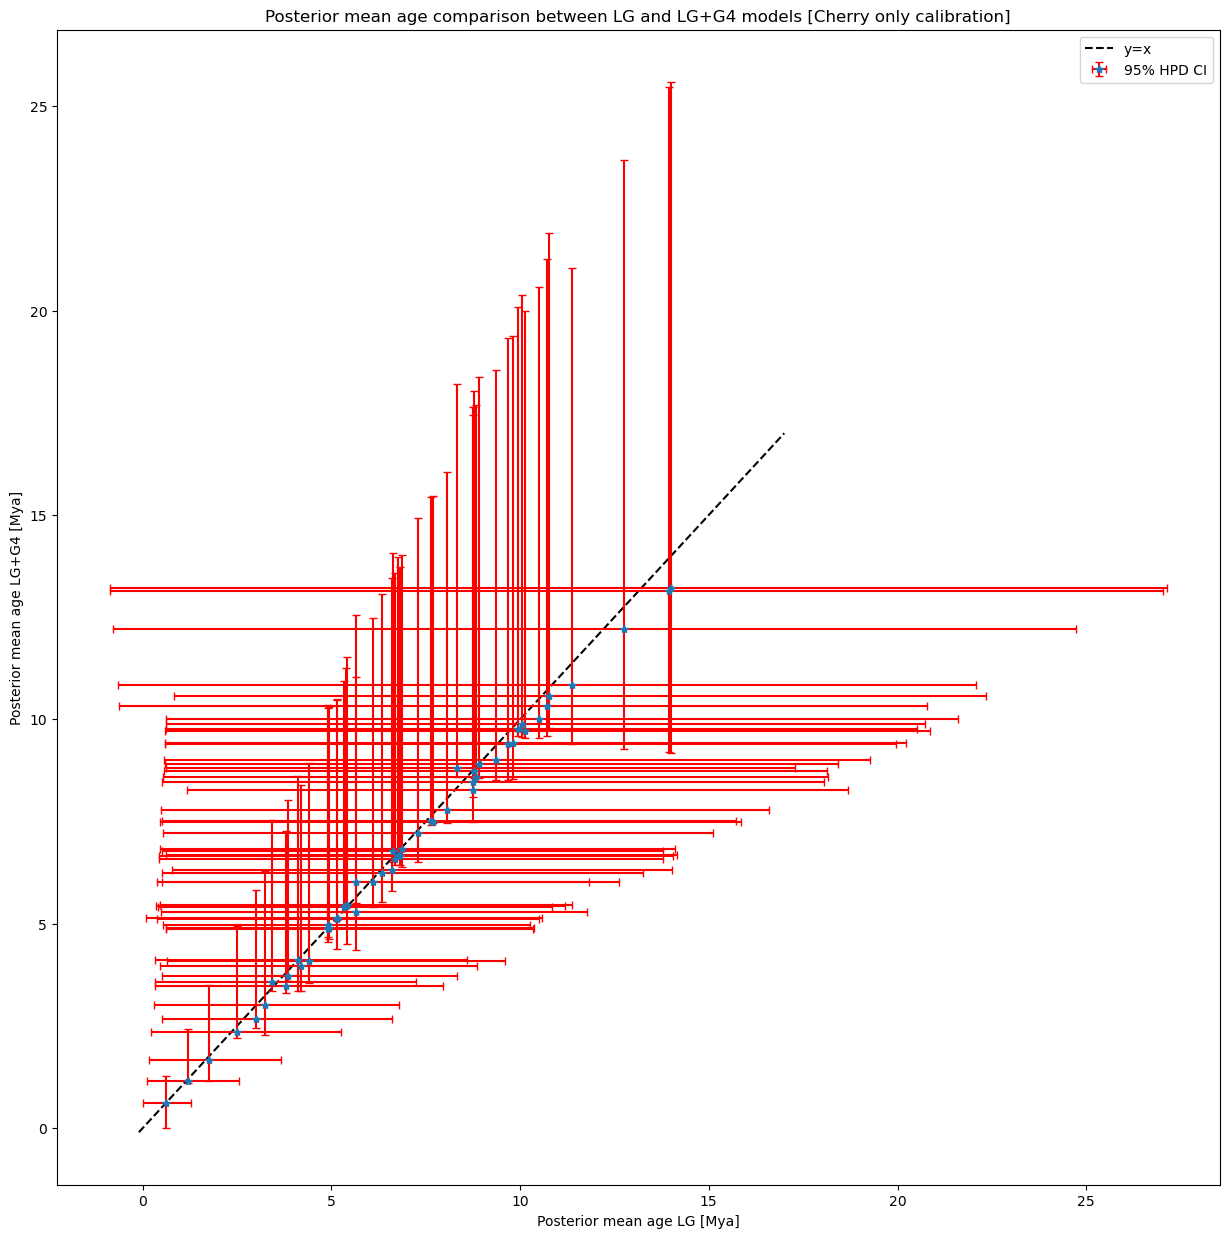

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4 models [Cherry only calibration]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_co.png')

In [11]:
posterior_mean_baseml

[13.9988,
 13.9558,
 12.7637,
 11.3852,
 10.7122,
 9.9448,
 8.9104,
 4.9138,
 5.6452,
 3.8089,
 3.2353,
 2.5026,
 1.7483,
 1.2073,
 0.6258,
 4.1995,
 10.05,
 8.3269,
 8.777,
 6.34,
 5.4093,
 5.1448,
 10.5017,
 9.8248,
 9.359,
 8.7646,
 8.0594,
 7.6899,
 6.8079,
 6.0939,
 5.3998,
 4.1114,
 3.4395,
 6.6803,
 5.1469,
 10.1285,
 2.9979,
 9.6924,
 8.8198,
 7.6428,
 6.86,
 4.9222,
 5.3282,
 7.3056,
 6.6422,
 5.6528,
 4.9361,
 6.7745,
 10.7545,
 6.5998,
 3.8584,
 4.3969,
 8.7525]

In [12]:
posterior_mean_iqtree

[13.2039,
 13.1414,
 12.2138,
 10.8468,
 10.3347,
 9.7539,
 8.9107,
 4.8657,
 5.29,
 3.4765,
 3.0005,
 2.3524,
 1.662,
 1.1518,
 0.625,
 3.9778,
 9.8929,
 8.8007,
 8.7379,
 6.2342,
 5.4611,
 5.1315,
 10.0081,
 9.4263,
 9.0091,
 8.4701,
 7.795,
 7.5013,
 6.6503,
 6.0262,
 5.4306,
 4.1095,
 3.5775,
 6.5767,
 5.1158,
 9.7205,
 2.6597,
 9.3961,
 8.5988,
 7.5064,
 6.822,
 4.9652,
 5.4048,
 7.2164,
 6.7877,
 6.0312,
 4.8954,
 6.6872,
 10.5611,
 6.3232,
 3.7285,
 4.0928,
 8.2662]

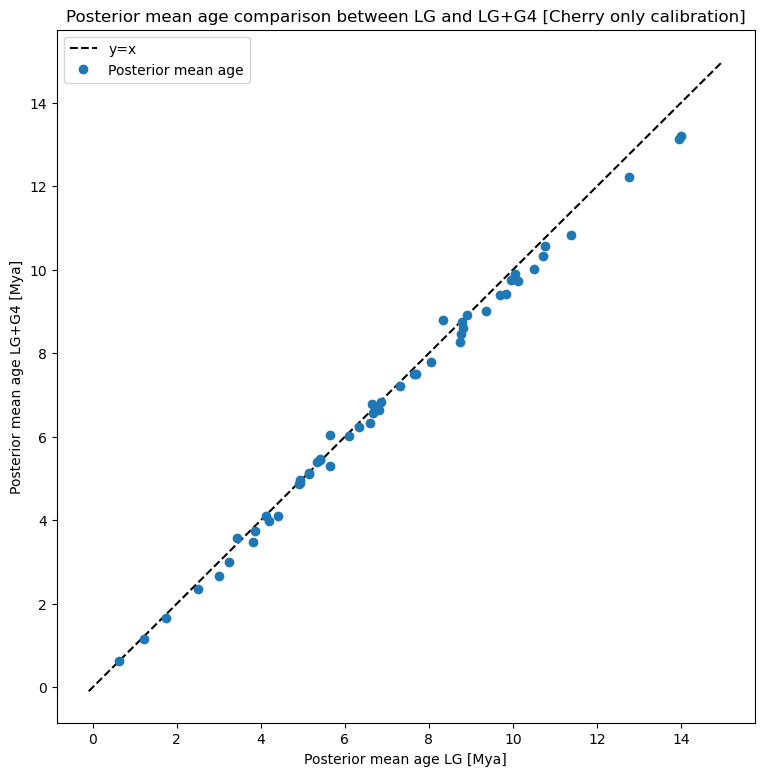

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,15], 
        [-0.1, 15], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4 [Cherry only calibration]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_co_scatter.png')